# Necessary libraries

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import LabelEncoder, StandardScaler, normalize
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, roc_auc_score
import warnings
warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize'] = (10, 6)
pd.set_option('display.max_columns', None)


In [4]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


# Classifying Loan Status Using Decision Trees

Classifying Loan Status Using Decision Trees
    
    Dataset:
Lending Club Loan Data
    
    Preprocessing Steps:
Handle missing values if any.

Encode categorical variables (e.g., one-hot encoding for loan grade, sub-grade, etc.).

Standardize numerical features.
   
    Task: 1
Implement a decision tree classifier to classify loan status and evaluate the model using accuracy and ROC-AUC.


In [ ]:
loan_data = pd.read_csv('/content/drive/MyDrive/Datasets /BWF_Week6_Datasets/LendingClubLoan.csv')
loan_data.head()

,Unnamed: 0,emp_title,emp_length,state,homeownership,annual_income,verified_income,debt_to_income,annual_income_joint,verification_income_joint,debt_to_income_joint,delinq_2y,months_since_last_delinq,earliest_credit_line,inquiries_last_12m,total_credit_lines,open_credit_lines,total_credit_limit,total_credit_utilized,num_collections_last_12m,num_historical_failed_to_pay,months_since_90d_late,current_accounts_delinq,total_collection_amount_ever,current_installment_accounts,accounts_opened_24m,months_since_last_credit_inquiry,num_satisfactory_accounts,num_accounts_120d_past_due,num_accounts_30d_past_due,num_active_debit_accounts,total_debit_limit,num_total_cc_accounts,num_open_cc_accounts,num_cc_carrying_balance,num_mort_accounts,account_never_delinq_percent,tax_liens,public_record_bankrupt,loan_purpose,application_type,loan_amount,term,interest_rate,installment,grade,sub_grade,issue_month,loan_status,initial_listing_status,disbursement_method,balance,paid_total,paid_principal,paid_interest,paid_late_fees
0,1,global config engineer,3.0,NJ,MORTGAGE,90000.0,Verified,18.01,NaN,NaN,NaN,0,38.0,2001,6,28,10,70795,38767,0,0,38.0,0,1250,2,5,5.0,10,0.0,0,2,11100,14,8,6,1,92.9,0,0,moving,individual,28000,60,14.07,652.53,C,C3,Mar-2018,Current,whole,Cash,27015.86,1999.33,984.14,1015.19,0.0
1,2,warehouse office clerk,10.0,HI,RENT,40000.0,Not Verified,5.04,NaN,NaN,NaN,0,NaN,1996,1,30,14,28800,4321,0,1,NaN,0,0,0,11,8.0,14,0.0,0,3,16500,24,14,4,0,100.0,0,1,debt_consolidation,individual,5000,36,12.61,167.54,C,C1,Feb-2018,Current,whole,Cash,4651.37,499.12,348.63,150.49,0.0
2,3,assembly,3.0,WI,RENT,40000.0,Source Verified,21.15,NaN,NaN,NaN,0,28.0,2006,4,31,10,24193,16000,0,0,28.0,0,432,1,13,7.0,10,0.0,0,3,4300,14,8,6,0,93.5,0,0,other,individual,2000,36,17.09,71.40,D,D1,Feb-2018,Current,fractional,Cash,1824.63,281.80,175.37,106.43,0.0
3,4,customer service,1.0,PA,RENT,30000.0,Not Verified,10.16,NaN,NaN,NaN,0,NaN,2007,0,4,4,25400,4997,0,1,NaN,0,0,1,1,15.0,4,0.0,0,2,19400,3,3,2,0,100.0,1,0,debt_consolidation,individual,21600,36,6.72,664.19,A,A3,Jan-2018,Current,whole,Cash,18853.26,3312.89,2746.74,566.15,0.0
4,5,security supervisor,10.0,CA,RENT,35000.0,Verified,57.96,57000.0,Verified,37.66,0,NaN,2008,7,22,16,69839,52722,0,0,NaN,0,0,1,6,4.0,16,0.0,0,10,32700,20,15,13,0,100.0,0,0,credit_card,joint,23000,36,14.07,786.87,C,C3,Mar-2018,Current,whole,Cash,21430.15,2324.65,1569.85,754.80,0.0


In [ ]:
# Printing information of dataset
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 56 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Unnamed: 0                        10000 non-null  int64  
 1   emp_title                         9167 non-null   object 
 2   emp_length                        9183 non-null   float64
 3   state                             10000 non-null  object 
 4   homeownership                     10000 non-null  object 
 5   annual_income                     10000 non-null  float64
 6   verified_income                   10000 non-null  object 
 7   debt_to_income                    9976 non-null   float64
 8   annual_income_joint               1495 non-null   float64
 9   verification_income_joint         1455 non-null   object 
 10  debt_to_income_joint              1495 non-null   float64
 11  delinq_2y                         10000 non-null  int64  
 12  month

### Handling Missing Values

In [ ]:
loan_data.isnull().sum()

Unnamed: 0                             0
emp_title                            833
emp_length                           817
state                                  0
homeownership                          0
annual_income                          0
verified_income                        0
debt_to_income                        24
annual_income_joint                 8505
verification_income_joint           8545
debt_to_income_joint                8505
delinq_2y                              0
months_since_last_delinq            5658
earliest_credit_line                   0
inquiries_last_12m                     0
total_credit_lines                     0
open_credit_lines                      0
total_credit_limit                     0
total_credit_utilized                  0
num_collections_last_12m               0
num_historical_failed_to_pay           0
months_since_90d_late               7715
current_accounts_delinq                0
total_collection_amount_ever           0
current_installm

In [ ]:
# Removing these columns because it has large amount of missing values.
loan_data.drop(['annual_income_joint', 'verification_income_joint', 'debt_to_income_joint', 'months_since_last_delinq', 'months_since_90d_late'], axis=1, inplace=True)

In [ ]:
# mode imputation for 'object' features
loan_data.fillna({'emp_title': loan_data['emp_title'].mode()[0]}, inplace=True)

In [ ]:
# Using mean imputation on 'float' features. Since remaining all features are numerical, we will use direct approach.
for feature in loan_data[['emp_length', 'debt_to_income', 'months_since_last_credit_inquiry', 'num_accounts_120d_past_due']]:
    loan_data.fillna({feature: loan_data[feature].mean()}, inplace=True)

In [ ]:
# Checking for the missing values in the dataset
print('Missing values in the dataset:', loan_data.isnull().sum())

Missing values in the dataset: Unnamed: 0                          0
emp_title                           0
emp_length                          0
state                               0
homeownership                       0
annual_income                       0
verified_income                     0
debt_to_income                      0
delinq_2y                           0
earliest_credit_line                0
inquiries_last_12m                  0
total_credit_lines                  0
open_credit_lines                   0
total_credit_limit                  0
total_credit_utilized               0
num_collections_last_12m            0
num_historical_failed_to_pay        0
current_accounts_delinq             0
total_collection_amount_ever        0
current_installment_accounts        0
accounts_opened_24m                 0
months_since_last_credit_inquiry    0
num_satisfactory_accounts           0
num_accounts_120d_past_due          0
num_accounts_30d_past_due           0
num_active_debit_ac

**Now there is no missing values in the dataset after imputation now lets proceed with the next step.**

### Encoding Categorical Variables

In [ ]:
# First we have to select only categorical columns/features

categorical_features = loan_data.select_dtypes(include=['object']).columns
categorical_features

Index(['emp_title', 'state', 'homeownership', 'verified_income',
       'loan_purpose', 'application_type', 'grade', 'sub_grade', 'issue_month',
       'loan_status', 'initial_listing_status', 'disbursement_method'],
      dtype='object')

In [ ]:
numerical_features = loan_data.select_dtypes(include=['float64', 'int64']).columns
numerical_features

Index(['Unnamed: 0', 'emp_length', 'annual_income', 'debt_to_income',
       'delinq_2y', 'earliest_credit_line', 'inquiries_last_12m',
       'total_credit_lines', 'open_credit_lines', 'total_credit_limit',
       'total_credit_utilized', 'num_collections_last_12m',
       'num_historical_failed_to_pay', 'current_accounts_delinq',
       'total_collection_amount_ever', 'current_installment_accounts',
       'accounts_opened_24m', 'months_since_last_credit_inquiry',
       'num_satisfactory_accounts', 'num_accounts_120d_past_due',
       'num_accounts_30d_past_due', 'num_active_debit_accounts',
       'total_debit_limit', 'num_total_cc_accounts', 'num_open_cc_accounts',
       'num_cc_carrying_balance', 'num_mort_accounts',
       'account_never_delinq_percent', 'tax_liens', 'public_record_bankrupt',
       'loan_amount', 'term', 'interest_rate', 'installment', 'balance',
       'paid_total', 'paid_principal', 'paid_interest', 'paid_late_fees'],
      dtype='object')

In [ ]:
# dropping column with name Unnamed because it is not making any sense in the data
numerical_features.drop('Unnamed: 0')

Index(['emp_length', 'annual_income', 'debt_to_income', 'delinq_2y',
       'earliest_credit_line', 'inquiries_last_12m', 'total_credit_lines',
       'open_credit_lines', 'total_credit_limit', 'total_credit_utilized',
       'num_collections_last_12m', 'num_historical_failed_to_pay',
       'current_accounts_delinq', 'total_collection_amount_ever',
       'current_installment_accounts', 'accounts_opened_24m',
       'months_since_last_credit_inquiry', 'num_satisfactory_accounts',
       'num_accounts_120d_past_due', 'num_accounts_30d_past_due',
       'num_active_debit_accounts', 'total_debit_limit',
       'num_total_cc_accounts', 'num_open_cc_accounts',
       'num_cc_carrying_balance', 'num_mort_accounts',
       'account_never_delinq_percent', 'tax_liens', 'public_record_bankrupt',
       'loan_amount', 'term', 'interest_rate', 'installment', 'balance',
       'paid_total', 'paid_principal', 'paid_interest', 'paid_late_fees'],
      dtype='object')

In [ ]:
# Applying label encoder to the categorical features
encoder = LabelEncoder()

for feature in categorical_features:
    loan_data[feature] = encoder.fit_transform(loan_data[feature])

### Standardizing Numerical Features

In [ ]:
scaler = StandardScaler()

for feature in numerical_features:
    loan_data[feature] = scaler.fit_transform(loan_data[feature].values.reshape(-1, 1))

### Model Training

In [ ]:
# Separating the features and the target variable
X = loan_data.drop('loan_status', axis=1)
y = loan_data['loan_status']

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)

DecisionTreeClassifier()

In [ ]:
# Predicting the target variable
y_pred = decision_tree.predict(X_test)

### Model Evaluation

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy of the model:", accuracy)

Accuracy of the model: 0.9685


# Predicting Hospital Readmission Using Logistic Regression

 Predicting Hospital Readmission Using Logistic Regression
    
    Dataset:
   
   Hospital Readmission Dataset
    
    Preprocessing Steps:
Handle missing values (e.g., fill missing values with mode for categorical variables).


Encode categorical variables (e.g., one-hot encoding for hospital type, region, etc.).


Standardize numerical features.
    
    Task: 2
Implement logistic regression to predict hospital readmission and evaluate the model using precision, recall, and F1-score.


In [ ]:
hospital_data = pd.read_csv('/content/drive/MyDrive/Datasets /BWF_Week6_Datasets/HospitalReadmissions.csv')
hospital_data.head()

,age,time_in_hospital,n_lab_procedures,n_procedures,n_medications,n_outpatient,n_inpatient,n_emergency,medical_specialty,diag_1,diag_2,diag_3,glucose_test,A1Ctest,change,diabetes_med,readmitted
0,[70-80),8,72,1,18,2,0,0,Missing,Circulatory,Respiratory,Other,no,no,no,yes,no
1,[70-80),3,34,2,13,0,0,0,Other,Other,Other,Other,no,no,no,yes,no
2,[50-60),5,45,0,18,0,0,0,Missing,Circulatory,Circulatory,Circulatory,no,no,yes,yes,yes
3,[70-80),2,36,0,12,1,0,0,Missing,Circulatory,Other,Diabetes,no,no,yes,yes,yes
4,[60-70),1,42,0,7,0,0,0,InternalMedicine,Other,Circulatory,Respiratory,no,no,no,yes,no


In [ ]:
hospital_data.shape

(25000, 17)

In [ ]:
hospital_data.describe()

,time_in_hospital,n_lab_procedures,n_procedures,n_medications,n_outpatient,n_inpatient,n_emergency
count,25000.00000,25000.00000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000
mean,4.45332,43.24076,1.352360,16.252400,0.366400,0.615960,0.186600
std,3.00147,19.81862,1.715179,8.060532,1.195478,1.177951,0.885873
min,1.00000,1.00000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,2.00000,31.00000,0.000000,11.000000,0.000000,0.000000,0.000000
50%,4.00000,44.00000,1.000000,15.000000,0.000000,0.000000,0.000000
75%,6.00000,57.00000,2.000000,20.000000,0.000000,1.000000,0.000000
max,14.00000,113.00000,6.000000,79.000000,33.000000,15.000000,64.000000


In [ ]:
hospital_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   age                25000 non-null  object
 1   time_in_hospital   25000 non-null  int64 
 2   n_lab_procedures   25000 non-null  int64 
 3   n_procedures       25000 non-null  int64 
 4   n_medications      25000 non-null  int64 
 5   n_outpatient       25000 non-null  int64 
 6   n_inpatient        25000 non-null  int64 
 7   n_emergency        25000 non-null  int64 
 8   medical_specialty  25000 non-null  object
 9   diag_1             25000 non-null  object
 10  diag_2             25000 non-null  object
 11  diag_3             25000 non-null  object
 12  glucose_test       25000 non-null  object
 13  A1Ctest            25000 non-null  object
 14  change             25000 non-null  object
 15  diabetes_med       25000 non-null  object
 16  readmitted         25000 non-null  objec

In [ ]:
hospital_data.isnull().sum()

age                  0
time_in_hospital     0
n_lab_procedures     0
n_procedures         0
n_medications        0
n_outpatient         0
n_inpatient          0
n_emergency          0
medical_specialty    0
diag_1               0
diag_2               0
diag_3               0
glucose_test         0
A1Ctest              0
change               0
diabetes_med         0
readmitted           0
dtype: int64

**There is no null values in the dataset so no need data imputation.**

### Encoding Categorical Data

In [ ]:
categorical_features = hospital_data.select_dtypes('object').columns

In [ ]:
numerical_features = hospital_data.select_dtypes(['int64', 'float64']).columns

In [ ]:
encoder = LabelEncoder()

for category in categorical_features:
    hospital_data[category] = encoder.fit_transform(hospital_data[category])

### Standarization Numerical Features

In [ ]:
# Applying standardization
scaler = StandardScaler()

for feature in numerical_features:
    hospital_data[feature] = scaler.fit_transform(hospital_data[[feature]])

### Model Training

In [ ]:
# Separating features and target variable
X = hospital_data.drop('readmitted', axis=1)
y = hospital_data['readmitted']

# Splitting the dataset into train and test data in 80/20 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Implementing the model
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)

LogisticRegression()

In [ ]:
# Predicting the target variable
Y_pred = lr_model.predict(X_test)

### Model Evaluation

In [ ]:
# Printing the classification report of the model

from sklearn.metrics import classification_report
print('Classification Report:\n\n', classification_report(y_test, Y_pred))

Classification Report:

               precision    recall  f1-score   support

           0       0.60      0.79      0.68      2658
           1       0.63      0.41      0.49      2342

    accuracy                           0.61      5000
   macro avg       0.61      0.60      0.59      5000
weighted avg       0.61      0.61      0.59      5000



# Classifying Digit Images Using Decision Trees

Classifying Digit Images Using Decision Trees
    
    Dataset:
  MNIST Dataset
    
    Preprocessing Steps:
Normalize pixel values.

Reshape data as needed for model input.
    
    Task: 3
Implement a decision tree classifier to classify handwritten digits and evaluate the model using accuracy and confusion matrix.


In [71]:
import zipfile

# Specify the path to your zip file in Google Drive
zip_file_path = '/content/drive/MyDrive/Datasets /BWF_Week6_Datasets/mnist dataset.zip'

# Specify the directory where you want to extract the files
extract_path = '/content/drive/MyDrive/Datasets /BWF_Week6_Datasets/'

# Open the zip file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
  # Extract all files to the specified directory
  zip_ref.extractall(extract_path)

In [72]:
# Loading the dataset
mnist_train_dataset = pd.read_csv('/content/drive/MyDrive/Datasets /BWF_Week6_Datasets/mnist_train.csv')
mnist_test_dataset = pd.read_csv('/content/drive/MyDrive/Datasets /BWF_Week6_Datasets/mnist_test.csv')

print('Train Dataset:',mnist_train_dataset.shape)
print('Test Dataset:',mnist_test_dataset.shape)

Train Dataset: (60000, 785)
Test Dataset: (10000, 785)


In [73]:
mnist_train_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Columns: 785 entries, label to 28x28
dtypes: int64(785)
memory usage: 359.3 MB


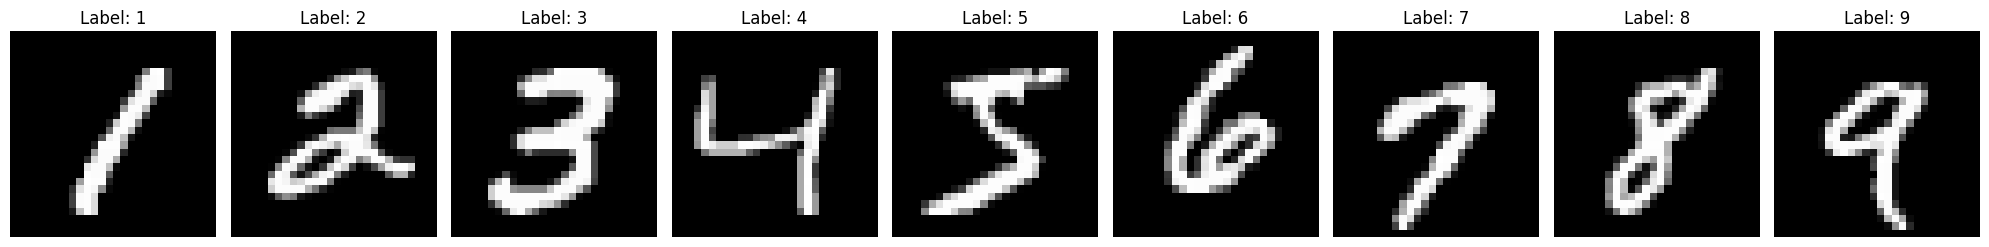

In [74]:
# Displaying the digital images corresponding to the labels in the data
labels_to_find = [1, 2, 3, 4, 5, 6, 7, 8, 9]
filtered_df = mnist_train_dataset[mnist_train_dataset['label'].isin(labels_to_find)]   # Finding indexes of particular labels

indexes = filtered_df.groupby('label').apply(lambda x: x.index[0]).tolist()

fig, axes = plt.subplots(1, len(indexes), figsize=(20, 5))
for i, index in enumerate(indexes):
    image = mnist_train_dataset.iloc[index, 1:].values.reshape(28, 28)
    axes[i].imshow(image, cmap='gray')
    axes[i].set_title(f'Label: {mnist_train_dataset.iloc[index]["label"]}')
    axes[i].axis('off')

plt.tight_layout()
plt.show()

In [75]:
# Separating the features and target variables from train and test dataset
X_train = mnist_train_dataset.drop('label', axis=1)
y_train = mnist_train_dataset['label']

X_test = mnist_test_dataset.drop('label', axis=1)
y_test = mnist_test_dataset['label']

###  Normalization

In [77]:
# Normalization
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Saving the preprocessed data
X_train = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test = pd.DataFrame(X_test_scaled, columns=X_test.columns)

### Model Training

In [78]:
# Implementing the model
dtc_model = DecisionTreeClassifier()
dtc_model.fit(X_train, y_train)

DecisionTreeClassifier()

In [80]:
# Predicting the target variable
y_pred = dtc_model.predict(X_test)

In [82]:
# Calculating the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy of the model:', accuracy)

Accuracy of the model: 0.8782


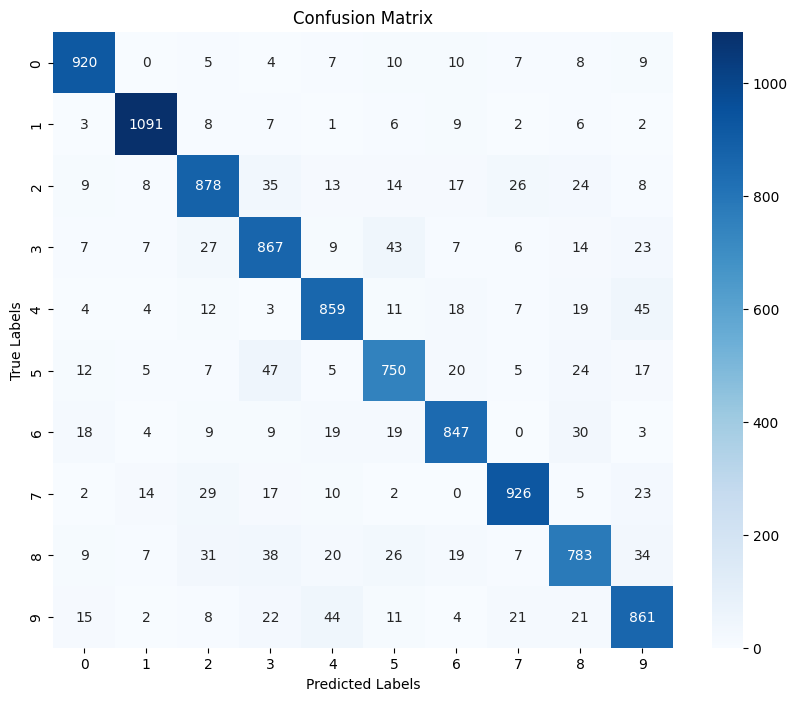

In [83]:
from sklearn.metrics import confusion_matrix

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create a heatmap of the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


# Predicting Loan Approval Using Logistic Regression

Predicting Loan Approval Using Logistic Regression

    Dataset:
Loan Prediction Dataset

    Preprocessing Steps:
Handle missing values (e.g., fill missing values with mode for categorical variables).

Encode categorical variables (e.g., one-hot encoding for gender, married status, etc.).

Standardize numerical features.

    Task: 4
Implement logistic regression to predict loan approval and evaluate the model using accuracy and confusion matrix.


### Zip file unzip

In [32]:
import zipfile

# Specify the path to your zip file in Google Drive
zip_file_path = '/content/drive/MyDrive/Datasets /BWF_Week6_Datasets/loan dataset.zip'

# Specify the directory where you want to extract the files
extract_path = '/content/drive/MyDrive/Datasets /BWF_Week6_Datasets/'

# Open the zip file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
  # Extract all files to the specified directory
  zip_ref.extractall(extract_path)

In [44]:
# Now you can read the CSV file
csv_file_path = '/content/drive/MyDrive/Datasets /BWF_Week6_Datasets/Loan.csv'  # Replace with the actual CSV file name
loan_df = pd.read_csv(csv_file_path)

# Print the first few rows of the DataFrame
loan_df.head()


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [45]:
loan_df.shape

(614, 13)

In [46]:
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


### Handling Missing Values

In [47]:
loan_df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [49]:
missing_value_features = loan_df[['LoanAmount', 'Loan_Amount_Term', 'Credit_History']]

for features in missing_value_features:
    loan_df.fillna({features: loan_df[features].median()}, inplace=True)

In [55]:
loan_df.dropna(inplace=True)


In [56]:
loan_df.shape

(614, 13)

In [57]:
loan_df.drop('Loan_ID', axis=1, inplace=True)

### Encoding Categorical Variables

In [59]:
categorical_features = loan_df.select_dtypes('object').columns
numerical_features = loan_df.select_dtypes(['int64', 'float64']).columns

In [61]:
# Applying Label Encoder
encoder = LabelEncoder()

for feature in categorical_features:
    loan_df[feature] = encoder.fit_transform(loan_df[feature])

### Standardization Numerical Features

In [62]:
scaler = StandardScaler()

for feature in numerical_features:
    loan_df[feature] = scaler.fit_transform(loan_df[[feature]])

### Model training

In [63]:
# Separating the features and target variable
X = loan_df.drop(['Loan_Status'], axis=1)
y = loan_df['Loan_Status']

# Splitting the dataset into train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [64]:
# Applying the model
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)

LogisticRegression()

In [65]:
y_pred = lr_model.predict(X_test)

### Model Evaluation

In [67]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.42      0.58        43
           1       0.76      0.99      0.86        80

    accuracy                           0.79       123
   macro avg       0.85      0.70      0.72       123
weighted avg       0.83      0.79      0.76       123



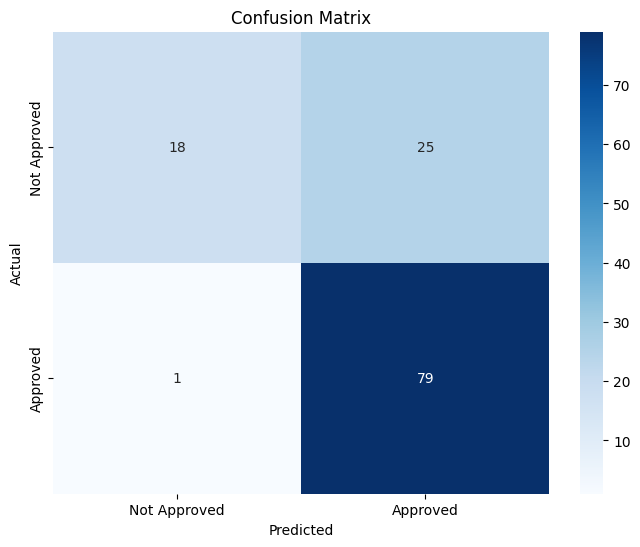

In [70]:
from sklearn.metrics import confusion_matrix
# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Visualize the confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Not Approved', 'Approved'],
            yticklabels=['Not Approved', 'Approved'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


# Classifying Wine Quality Using Decision Trees

 Classifying Wine Quality Using Decision Trees

    Dataset:
Wine Quality Dataset

    Preprocessing Steps:
Handle missing values if any.

Standardize features.

Encode categorical variables if present.

    Task: 5
Implement a decision tree classifier to classify wine quality (good/bad) and evaluate the model using accuracy and ROC-AUC.


In [20]:
wine_df = pd.read_csv('/content/drive/MyDrive/Datasets /BWF_Week6_Datasets/WineQuality.csv')
wine_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [21]:
wine_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [22]:
wine_df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

**No missing Values in the dataset.**

### Standardizing Features

In [23]:
X = wine_df.drop('quality', axis=1)
y = wine_df['quality']

### Standardization

In [24]:
# Applying Standardization
scaler = StandardScaler()
X_scaled = X.copy()

for features in X.columns:
    X_scaled[features] = scaler.fit_transform(X[[features]])

### Encoding Categorical data

In [25]:
# Setting the threshlod that if rating is greater than 5, it'll be good(1), else bad (0).
y = y.apply(lambda x:1 if x>5 else 0)

print('Categories of quality:', y.nunique(), ': ', y.unique())
print(y.value_counts())

Categories of quality: 2 :  [0 1]
quality
1    855
0    744
Name: count, dtype: int64


### Model Training

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [27]:
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)

DecisionTreeClassifier()

In [28]:
# Predicting the target variable
y_pred = dtc.predict(X_test)

### Model Evaluation

In [29]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.69      0.72      0.70       141
           1       0.77      0.74      0.76       179

    accuracy                           0.73       320
   macro avg       0.73      0.73      0.73       320
weighted avg       0.73      0.73      0.73       320



In [30]:
# Calculating the roc-auc score of the model

y_pred_proba = dtc.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_pred_proba)
print('ROC-AUC score of the model:', roc_auc)

ROC-AUC score of the model: 0.7296644082570625
